In [46]:
# multidimensional arrays
import numpy as np

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

import math 

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

 # Exercise 09.1
 
The goal in this exercise is to solve the traveling salesman problem. It consists in finding the minimal lenght of the path which goes through a certain number of cities, each one at a fixed position. In our case the cities are $32$ and are positioned randomly: 
1. on a circumference
2. inside a square 

The bonds of the problem are:
1. the salesman must start from the city $1$
2. the salemsman must visit only one time every city and must be back to the first city at the end of the path

To solve this problem we use a Genetic Algorithm. The procedure is the following:
1. I chose 32 points randomly on a circumference of radius equal to 1 or inside a square of side 2 
2. I created an initial popolation of $100$ individuals written with the form of a vector whose elements are numbers between 1 and 32. Initially I created all equal individual, then by randomly choosing a position in the vector (excluded the first one) I exchange the element in that position with a element in an another randomly chosen position.
3. I wrote the four mutation operators as described in the assignment and I used them on all the $100$ individuals with a probability for each of $10$%. 
4. I ordered the individuals from the one with the minimal lenght of the path to the one of the maximal lenght by calculating the following value: 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
5. I wrote a selection operator whose task is to select a number between 0 and 100. This number is calculated with the following formula: $j= int(100r^p)$ where $p$ is set to $2$ and $r$ is a variable randomly chosen from 0 and 1. 
6. I added a mutation operator which uses the select operator to chose two individual and acts like it is described in the exercise assignment. This is done for 50 times (because every time two individual are chosen) with a probability equal to $70$%, so that after this is accomplished a new popolation is generated. 

This procedure is reiterated for $2000$ times. We can see from the following plot that in the case of the circumference already after $\simeq 500$ the minimal lenght $L^{1}$ in a generated popolation has reached a stationary value, while in the case of the square the best path is reached after $\simeq 1700$. It's clear that it's easier to find the shortest path in the first case than in the second where the constraint of the placed random numbers is less strict. 

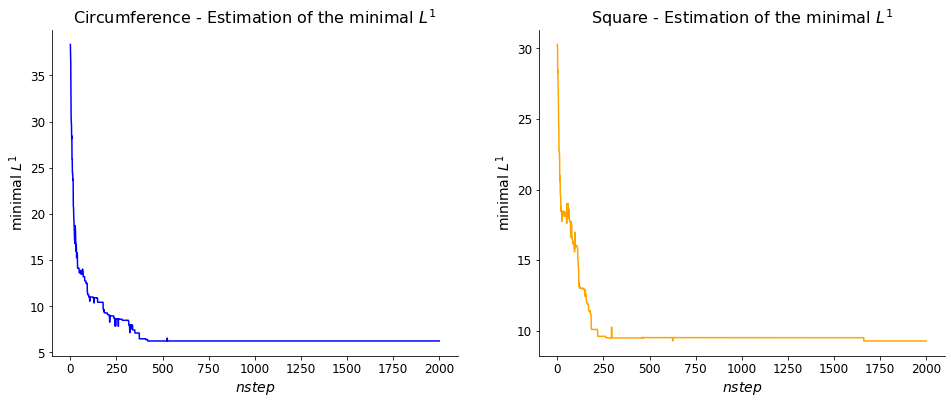

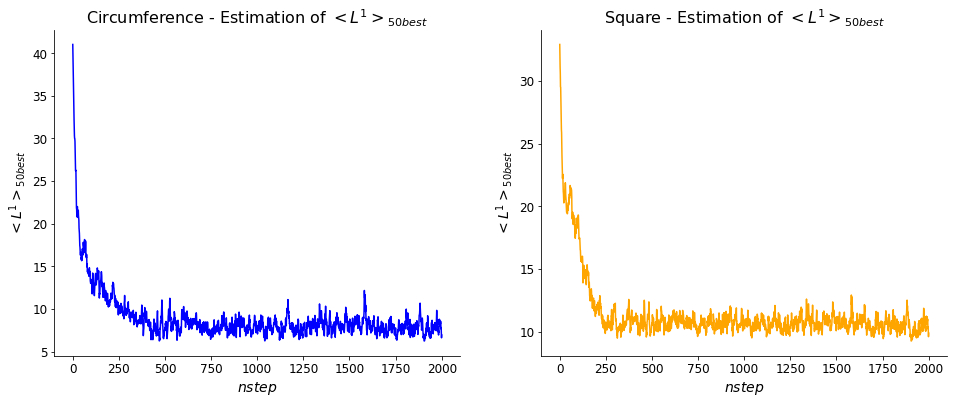

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

x = np.linspace(0,2000,2000)
f_best = np.zeros((2,2000))
f_ave = np.zeros((2,2000))
shape = ['circ','quadr']
title = ['Circumference', 'Square']
color = ['blue', 'orange']


for i in range(2):
    f_best[i,:]= np.loadtxt(f"bestL_{shape[i]}.out", usecols=(0), unpack='true')
    f_ave[i,:]= np.loadtxt(f"averageL_{shape[i]}.out", usecols=(0), unpack='true')
    
for i in range(2):
    axx = ax[i]
    axx.plot(x, f_best[i,:], color =color[i]);
    axx.set_xlabel(r"$nstep$")
    axx.set_ylabel(r"minimal $L^1$")
    axx.set_title(f"{title[i]} - Estimation of the minimal $L^1$");
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for i in range(2):
    axx = ax[i]
    axx.plot(x, f_ave[i,:], color = color[i]);
    axx.set_xlabel(r"$nstep$")
    axx.set_ylabel(r"$<L^1>_{{50best}}$")
    axx.set_title(f"{title[i]} - Estimation of $<L^1>_{{50best}}$");

In the following plots the path with the minimal $L^{1}$ in the initial popolation is compared to the one in the final popolation. It is evident that the Genetic Algorithm really found a possible best path for the salesman in both cases (circumference and square).  

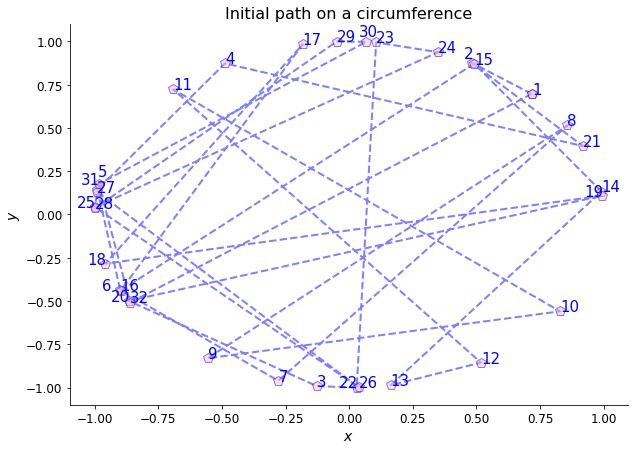

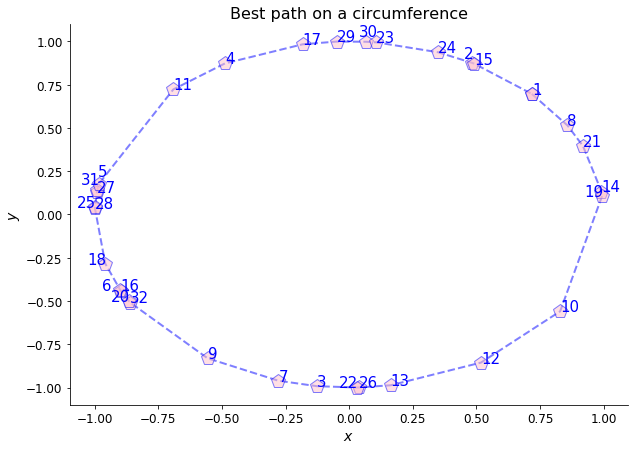

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
cities, x, y = np.loadtxt("initialpath_circ.out", usecols=(0,1,2), unpack='true')

ax.plot(x, y, '--p', MarkerSize = 10, markerfacecolor='pink', color="blue", alpha=0.5, lw=2);

for i in range(32):
    if(i==5 or i==17 or i==24 or i==30 or i==18 or i==21 or i==19): ax.text(x[i]-0.07,y[i], f'{int(cities[i])}', fontsize = 15,color ='b') 
    if(i==4): ax.text(x[i],y[i]+0.08, f'{int(cities[i])}', fontsize = 15,color ='b')
    if(i==29 or i==1): ax.text(x[i]-0.03,y[i]+0.03, f'{int(cities[i])}', fontsize = 15,color ='b')
    if(i!= 1 and i!=29 and i!=5 and i!=17 and i!=24 and i!=30 and i!=4 and i!=18 and i!=21 and i!=19): ax.text(x[i],y[i], f'{int(cities[i])}', fontsize=15, color ='b')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

ax.set_title(f"Initial path on a circumference");

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

cities, x, y = np.loadtxt("bestpath_circ.out", usecols=(0,1,2), unpack='true')

ax.plot(x, y, '--p', MarkerSize = 15, markerfacecolor='pink', color="blue", alpha=0.5, lw=2);

for i in range(32):
    if(i==9 or i==17 or i==19 or i==22 or i==4 or i==14 or i==16): ax.text(x[i]-0.07,y[i], f'{int(cities[i])}', fontsize = 15,color ='b') 
    if(i==21): ax.text(x[i],y[i]+0.08, f'{int(cities[i])}', fontsize = 15,color ='b')
    if(i==27 or i==30): ax.text(x[i]-0.03,y[i]+0.03, f'{int(cities[i])}', fontsize = 15,color ='b')
    if(i!= 9 and i!=17 and i!=19 and i!=22 and i!=4 and i!=14 and i!=27 and i!=30 and i!=21 and i!=16): ax.text(x[i],y[i], f'{int(cities[i])}', fontsize=15, color ='b')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

ax.set_title(f"Best path on a circumference");

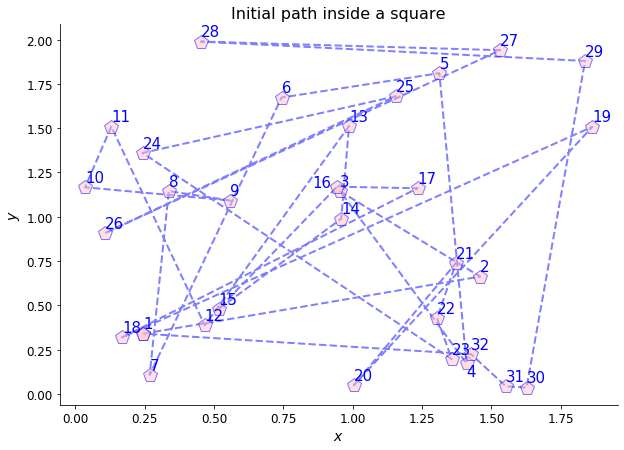

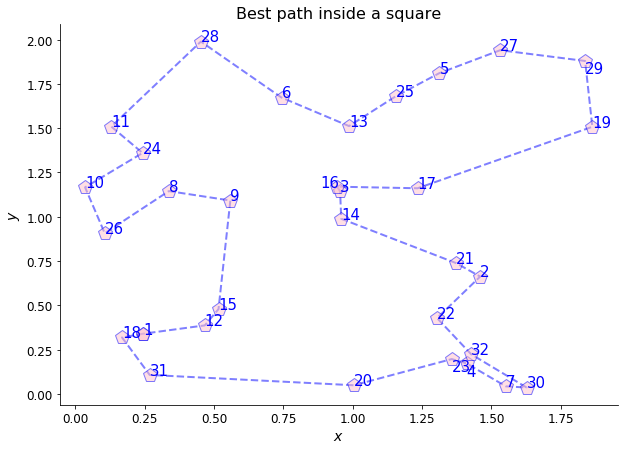

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
cities, x, y = np.loadtxt("initialpath_quadr.out", usecols=(0,1,2), unpack='true')

cities = np.linspace(1,32,32)
ax.plot(x, y, '--p', MarkerSize = 15, markerfacecolor='pink', color="blue", alpha=0.5, lw=2);

for i in range(32):
    if(i==3): ax.text(x[i],y[i]-0.07, f'{int(cities[i])}', fontsize=15, color ='b')
    if(i==15): ax.text(x[i]-0.09,y[i], f'{int(cities[i])}', fontsize=15, color ='b')
    if(i!=3 and i!=15): ax.text(x[i],y[i]+0.03, f'{int(cities[i])}', fontsize=15, color ='b')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

ax.set_title(f"Initial path inside a square");

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

cities, x, y = np.loadtxt("bestpath_quadr.out", usecols=(0,1,2), unpack='true')

ax.plot(x, y, '--p', MarkerSize = 15, markerfacecolor='pink', color="blue", alpha=0.5,  lw=2);

for i in range(32):
    if(i==5 or i==17 or i==4): ax.text(x[i],y[i]-0.07, f'{int(cities[i])}', fontsize=15, color ='b')
    if(i==14): ax.text(x[i]-0.06,y[i], f'{int(cities[i])}', fontsize=15, color ='b')
    if(i!=17 and i!=14 and i!=4 and i!=5): ax.text(x[i],y[i], f'{int(cities[i])}', fontsize=15, color ='b')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

ax.set_title(f"Best path inside a square");